# 911 Calls Capstone Project

911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df=pd.read_csv('911.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [24]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [25]:
#df['zip'].value_counts()[0:5,]    #both same answer  or using head(5)
df.groupby('zip').count()['e'].sort_values(ascending=False)[0:5,]

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: e, dtype: int64

In [26]:
df['twp'].value_counts()[0:5,]

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [27]:
#df['title'].nunique()   another way
df['title'].value_counts().count()

110

In [28]:
df['Reason']=df['title'].apply(lambda x: x.upper().split(':')[0])

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,FIRE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [30]:
df['Reason'].value_counts()

EMS        48877
TRAFFIC    35695
FIRE       14920
Name: Reason, dtype: int64

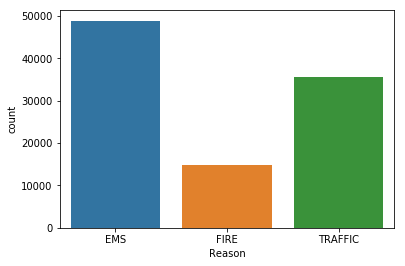

In [31]:
sns.countplot(x='Reason',data=df)

In [32]:
#type(df['timeStamp'].iloc[0])   give Str
df['timeStamp'].dtypes

dtype('O')

In [33]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [34]:
df['timeStamp'].dtypes
time = df['timeStamp'].iloc[0]
time.second

0

In [35]:
#df['timeStamp'].dtypes
time=df['timeStamp'].iloc[0]
time.hour

17

In [36]:
df['timeStamp'][0].hour


17

In [38]:

#df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
#df['Month'] = df['timeStamp'].apply(lambda time: time.month)
#df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

def time_func(ts,text):
    if text=='hour':
        return ts.hour
    elif text=='Month':
        return ts.month
    elif text=='day1':
        return ts.weekday()
    elif text=='day2':
        return ts.weekday_name
    elif text=='day3':
        return ts.day 


df['Hour']=df.apply(lambda x: time_func(x['timeStamp'],'hour'),axis=1)  # 
df['Month']=df.apply(lambda x: time_func(x['timeStamp'],'Month'),axis=1)  # 
df['Day of Week int']=df.apply(lambda x: time_func(x['timeStamp'],'day1'),axis=1)
df['Day of Week name']=df.apply(lambda x: time_func(x['timeStamp'],'day2'),axis=1)
df['Day']=df.apply(lambda x: time_func(x['timeStamp'],'day3'),axis=1)

df.head()

#df['timeStamp'].dtypes
#df['Hour'] = df['timeStamp'].apply(time_func)
#df['Month'] = df['timeStamp'].apply(time_func)
#df['sec'] = df['timeStamp'].apply(time_func)
#df['Day_of_week'] = df['timeStamp'].dt.weekday_name   #directly getting name of the week day

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week int,Day of Week name,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thursday,10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thursday,10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,FIRE,17,12,3,Thursday,10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thursday,10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,Thursday,10


In [40]:
df.groupby(['Month','Day']).count()['e']
#df.head()

Month  Day
1      1      263
       2      335
       3      324
       4      402
       5      448
       6      434
       7      385
       8      359
       9      365
       10     406
       11     417
       12     588
       13     430
       14     399
       15     440
       16     327
       17     285
       18     333
       19     432
       20     395
       21     364
       22     486
       23     913
       24     662
       25     575
       26     505
       27     441
       28     436
       29     422
       30     351
             ... 
8      17     415
       18     359
       19     447
       20     328
       21     357
       22     389
       23     439
       24     132
12     10     115
       11     396
       12     403
       13     319
       14     447
       15     421
       16     377
       17     388
       18     346
       19     279
       20     271
       21     430
       22     448
       23     524
       24     445
       25     323

In [41]:
df['Month-Day']=df['Month'].astype(str)+'-'+df['Day'].astype(str)
df['Month-Day'].value_counts()

1-23     913
2-24     679
1-24     662
1-12     588
4-3      586
7-25     580
1-25     575
2-16     560
2-15     541
12-23    524
1-26     505
1-22     486
7-13     481
2-2      471
6-8      467
5-13     466
5-26     458
4-1      456
8-11     449
1-5      448
12-22    448
2-25     447
12-14    447
8-19     447
7-26     446
12-24    445
5-25     444
7-8      444
7-28     443
7-19     443
        ... 
4-17     309
6-5      307
4-30     306
3-19     306
3-13     304
3-22     303
4-9      302
2-21     300
7-2      298
3-5      297
12-26    296
5-30     295
7-4      290
3-6      286
6-26     286
1-17     285
1-31     283
4-10     281
7-9      279
12-19    279
12-20    271
3-27     268
4-12     264
1-1      263
5-15     263
2-7      255
3-20     244
5-1      140
8-24     132
12-10    115
Name: Month-Day, Length: 259, dtype: int64

In [42]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week int,Day of Week name,Day,Month-Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thursday,10,12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thursday,10,12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,FIRE,17,12,3,Thursday,10,12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thursday,10,12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,Thursday,10,12-10


In [43]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [44]:
df['Day of Week name2']=df['Day of Week int'].map(dmap)  #something like join:  the integers day df to integer day of dictionary
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week int,Day of Week name,Day,Month-Day,Day of Week name2
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thursday,10,12-10,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thursday,10,12-10,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,FIRE,17,12,3,Thursday,10,12-10,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thursday,10,12-10,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,Thursday,10,12-10,Thu


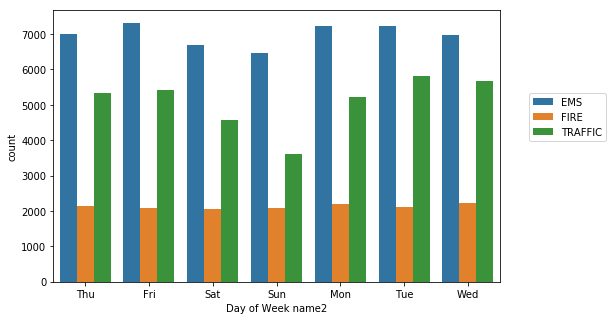

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(x='Day of Week name2',hue='Reason',data=df)
plt.legend(loc='lower right',bbox_to_anchor=(1.25,0.5)) 

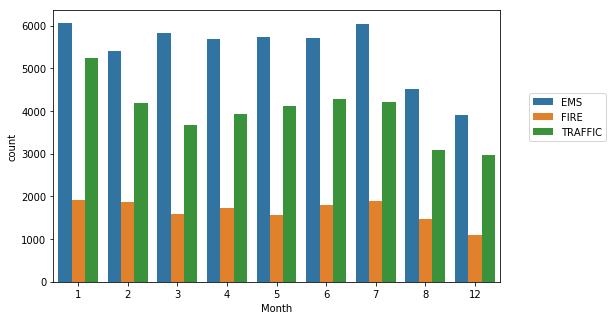

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(x='Month',hue='Reason',data=df)
plt.legend(loc='lower right',bbox_to_anchor=(1.25,0.5)) 

In [48]:
bymonth=df.groupby(['Month']).count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week int,Day of Week name,Day,Month-Day,Day of Week name2
Month,,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

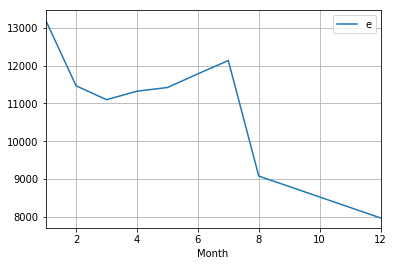

In [49]:
bymonth.plot.line(x=bymonth.index,y='e',grid=True,xlim=[1,12])

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week int,Day of Week name,Day,Month-Day,Day of Week name2
Month,,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969,7969,7969


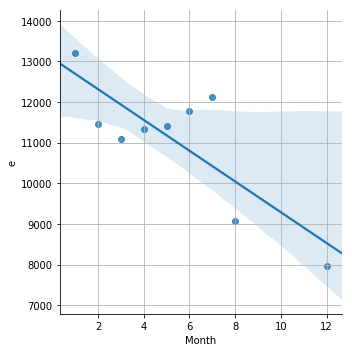

In [51]:
import seaborn as sns
%matplotlib inline
sns.lmplot(x='Month',y='e',data=bymonth.reset_index())  #seaborn does not plot by index, reset_index(): Reset index of DataFrame to row numbers, movingindex to columns

plt.grid(b=True, which='major')
bymonth

In [52]:
# another way df['Date']=df['timeStamp'].apply(lambda t: t.date())
from datetime import date
from datetime import datetime
df['Date']=df.apply(lambda x:(x['timeStamp'].date()),axis=1)

df.head(30)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week int,Day of Week name,Day,Month-Day,Day of Week name2,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thursday,10,12-10,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thursday,10,12-10,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,FIRE,17,12,3,Thursday,10,12-10,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thursday,10,12-10,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,Thursday,10,12-10,Thu,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,3,Thursday,10,12-10,Thu,2015-12-10
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,17,12,3,Thursday,10,12-10,Thu,2015-12-10
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,17,12,3,Thursday,10,12-10,Thu,2015-12-10
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,17,12,3,Thursday,10,12-10,Thu,2015-12-10
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,TRAFFIC,17,12,3,Thursday,10,12-10,Thu,2015-12-10


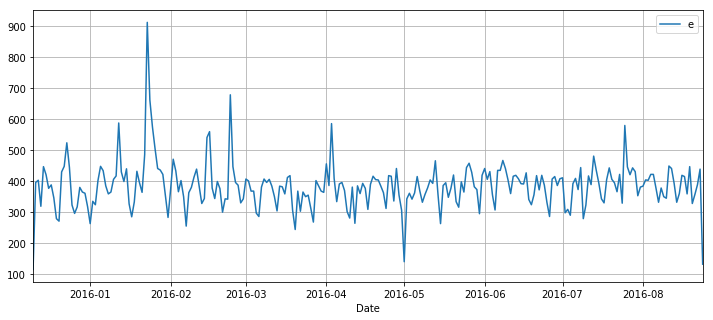

In [53]:
#df.groupby('Date').count()['twp'].plot()   another way

#df['Date'].value_counts()
df_date_group=df.groupby(['Date']).count()
#bymonth=df.groupby(['Month']).count()
df_date_group.head()
df_date_group.plot(x=df_date_group.index,y='e',figsize=(12,5),grid=True,xlim=[df_date_group.index.min(),df_date_group.index.max()])


In [54]:
#df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot() another way

df_date_reason_group=df.groupby(['Date','Reason']).count()
df_date_reason_group.head(9)

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Date       Reason                                                           
2015-12-10 EMS       57   57    57   52     57         57   57    57   57   
           FIRE      15   15    15   13     15         15   15    15   15   
           TRAFFIC   43   43    43   35     43         43   43    41   43   
2015-12-11 EMS      186  186   186  166    186        186  186   186  186   
           FIRE      69   69    69   59     69         69   68    68   69   
           TRAFFIC  141  141   141  108    141        141  141   137  141   
2015-12-12 EMS      189  189   189  171    189        189  189   189  189   
           FIRE      68   68    68   53     68         68   68    68   68   
           TRAFFIC  146  146   146  109    146        146  146   144  146   

                    Hour  Month  Day of Week int  Day of Week name  Day  \
Date       Reason                                                         
2015-12-10 EMS        57     57               57                57   57   
           FIRE       15     15               15                15   15   
           TRAFFIC    43     43               43                43   43   
2015-12-11 EMS       186    186              186               186  186   
           FIRE       69     69               69                69   69   
           TRAFFIC   141    141              141               141  141   
2015-12-12 EMS       189    189              189               189  189   
           FIRE       68     68               68                68   68   
           TRAFFIC   146    146              146               146  146   

                    Month-Day  Day of Week name2  
Date       Reason                                 
2015-12-10 EMS             57                 57  
           FIRE            15                 15  
           TRAFFIC         43                 43  
2015-12-11 EMS            186                186  
           FIRE            69                 69  
           TRAFFIC        141                141  
2015-12-12 EMS            189                189  
           FIRE            68                 68  
           TRAFFIC        146                146

In [55]:
#df_date_reason_group.plot(x=df_date_group.index,y=df_date_group[df_date_group['Resaon']='Traffic'])
df_date_reason_groupr=df_date_reason_group.reset_index()
#df_date_reason_group['lat']
df_date_reason_groupr

,Date,Reason,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week int,Day of Week name,Day,Month-Day,Day of Week name2
0,2015-12-10,EMS,57,57,57,52,57,57,57,57,57,57,57,57,57,57,57,57
1,2015-12-10,FIRE,15,15,15,13,15,15,15,15,15,15,15,15,15,15,15,15
2,2015-12-10,TRAFFIC,43,43,43,35,43,43,43,41,43,43,43,43,43,43,43,43
3,2015-12-11,EMS,186,186,186,166,186,186,186,186,186,186,186,186,186,186,186,186
4,2015-12-11,FIRE,69,69,69,59,69,69,68,68,69,69,69,69,69,69,69,69
5,2015-12-11,TRAFFIC,141,141,141,108,141,141,141,137,141,141,141,141,141,141,141,141
6,2015-12-12,EMS,189,189,189,171,189,189,189,189,189,189,189,189,189,189,189,189
7,2015-12-12,FIRE,68,68,68,53,68,68,68,68,68,68,68,68,68,68,68,68
8,2015-12-12,TRAFFIC,146,146,146,109,146,146,146,144,146,146,146,146,146,146,146,146
9,2015-12-13,EMS,190,190,190,178,190,190,190,190,190,190,190,190,190,190,190,190


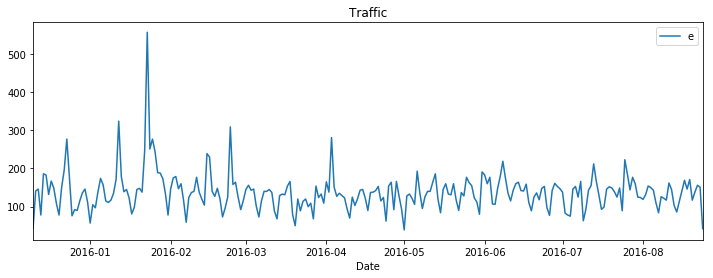

In [56]:

X=df_date_reason_groupr[df_date_reason_groupr['Reason']=='TRAFFIC']
X
X.plot(x='Date',y='e',title='Traffic',figsize=(12,4),xlim=[X['Date'].min(),X['Date'].max()])


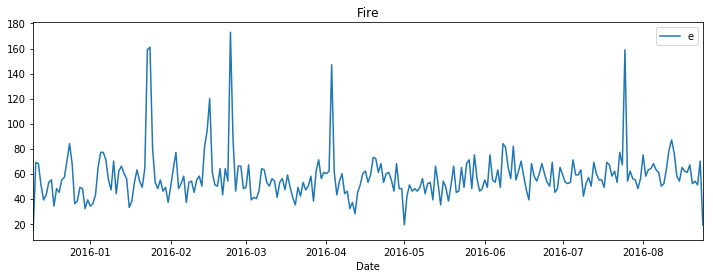

In [57]:
Y=df_date_reason_groupr[df_date_reason_groupr['Reason']=='FIRE']
Y
Y.plot(x='Date',y='e',title='Fire',figsize=(12,4),xlim=[Y['Date'].min(),Y['Date'].max()])

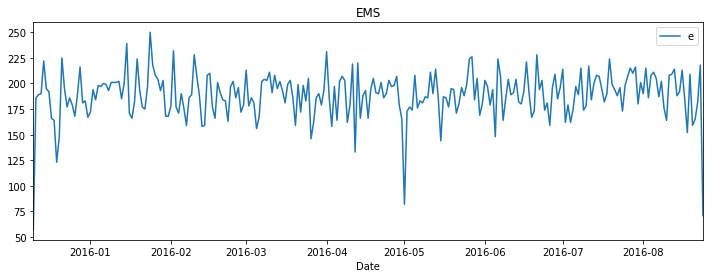

In [58]:
Z=df_date_reason_groupr[df_date_reason_groupr['Reason']=='EMS']
Z
Z.plot(x='Date',y='e',title='EMS',figsize=(12,4),xlim=[Z['Date'].min(),Z['Date'].max()])

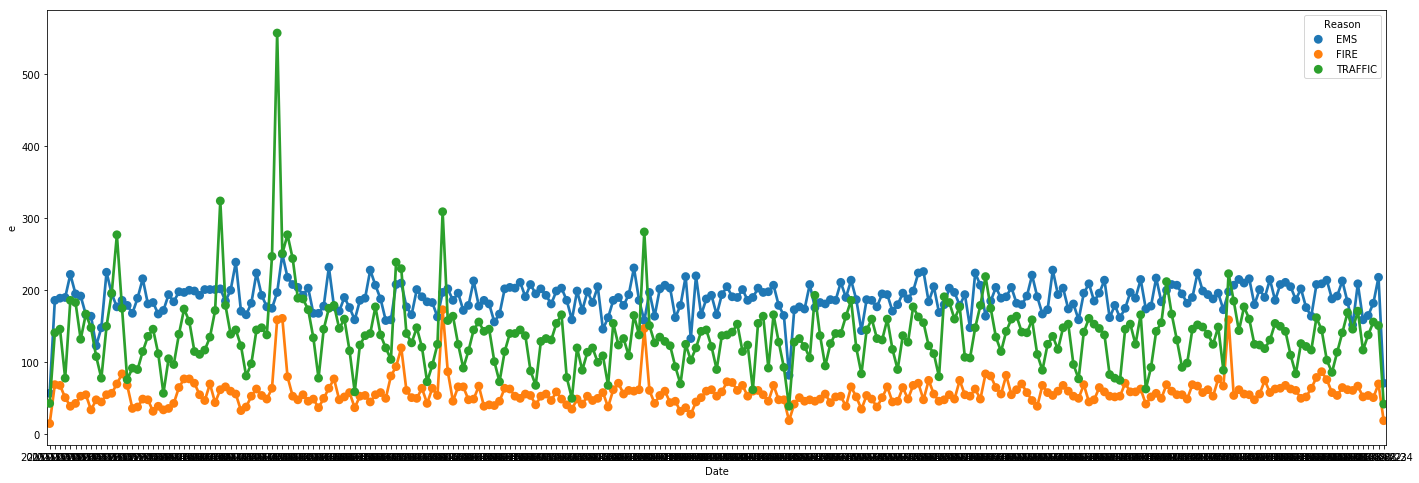

In [70]:
#import matplotlib.ticker as ticker
plt.figure(figsize=(24,8))
ax=sns.pointplot(x='Date',y='e',hue='Reason',data=df_date_reason_groupr)


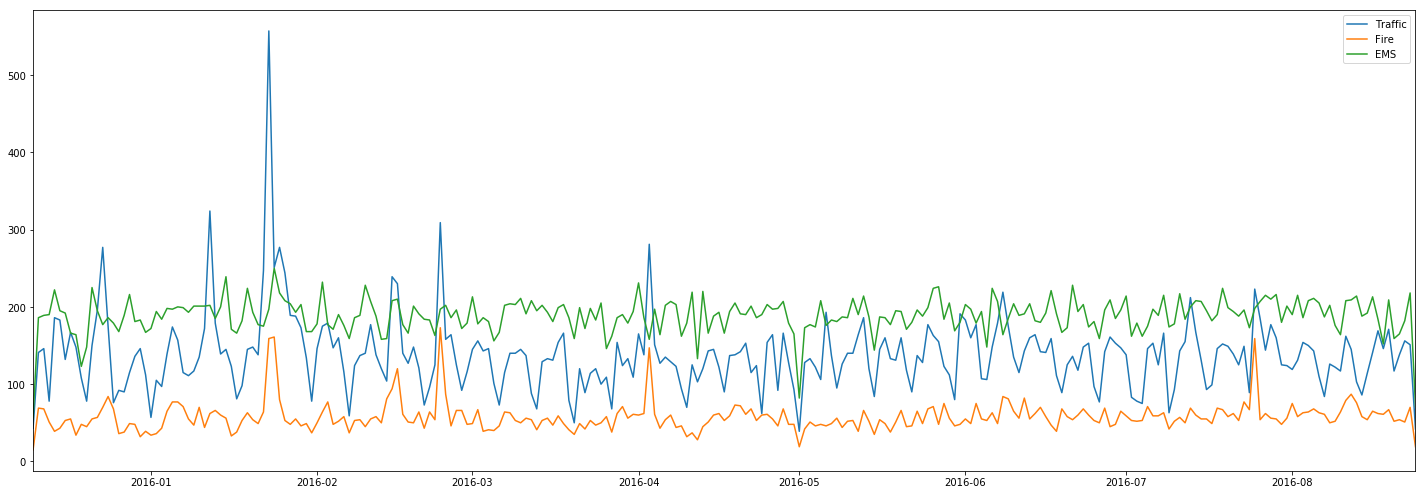

In [79]:
fig=plt.figure(figsize=(24,8))
ax1=fig.add_axes([0.1,0.1,0.8,0.8])

ax1.plot(X['Date'],X['e'])
ax1.plot(Y['Date'],Y['e'])
ax1.plot(Z['Date'],Z['e'])
ax1.set_xlim([X['Date'].min(),X['Date'].max()])
ax1.legend(['Traffic','Fire','EMS'])
#bymonth.plot.line(x=bymonth.index,y='e',grid=True,xlim=[1,12])  ??

In [80]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week int,Day of Week name,Day,Month-Day,Day of Week name2,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thursday,10,12-10,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thursday,10,12-10,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,FIRE,17,12,3,Thursday,10,12-10,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thursday,10,12-10,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,Thursday,10,12-10,Thu,2015-12-10


In [114]:
df.groupby(['Hour','Day of Week name2']).count()['e']

Hour  Day of Week name2
0     Fri                  275
      Mon                  282
      Sat                  375
      Sun                  383
      Thu                  278
      Tue                  269
      Wed                  250
1     Fri                  235
      Mon                  221
      Sat                  301
      Sun                  306
      Thu                  202
      Tue                  240
      Wed                  216
2     Fri                  191
      Mon                  201
      Sat                  263
      Sun                  286
      Thu                  233
      Tue                  186
      Wed                  189
3     Fri                  175
      Mon                  194
      Sat                  260
      Sun                  268
      Thu                  159
      Tue                  170
      Wed                  209
4     Fri                  201
      Mon                  204
                          ... 
19    Tue      

In [118]:
dg=df.groupby(['Hour','Day of Week name2']).count()['e'].unstack(level=0)
dg

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week name2,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


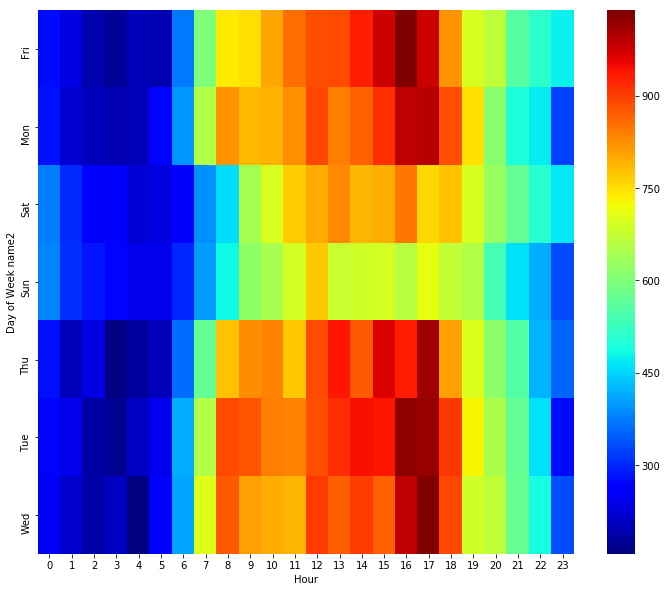

In [142]:
plt.figure(figsize=(12,10))
sns.heatmap(dg,cmap='jet')  # viridis

In [122]:
#dg=df.groupby(['Hour','Day of Week name2']).count()  #[['Hour','Day of Week name2','e']]
#dh=dg.reset_index()
#dk=dh[['Hour','Day of Week name2','e']]



<Figure size 864x720 with 0 Axes>

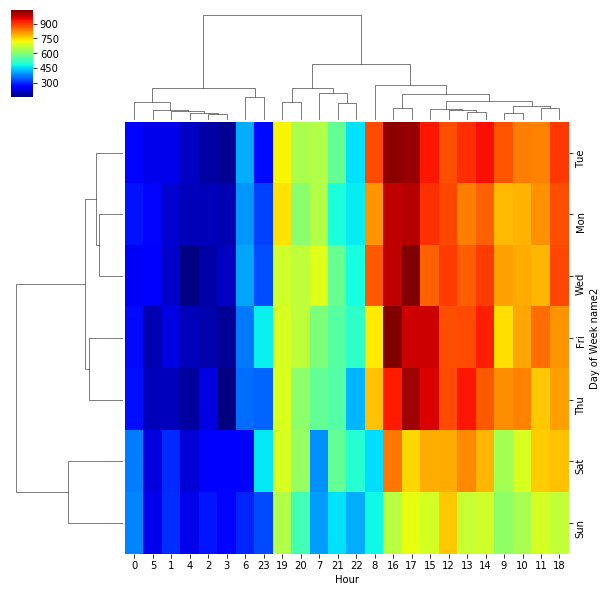

In [143]:
plt.figure(figsize=(12,10))
sns.clustermap(dg,cmap='jet') 

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [144]:
dh=df.groupby(['Month','Day of Week name2']).count()['e'].unstack(level=0)

In [145]:
dh

Month,1,2,3,4,5,6,7,8,12
Day of Week name2,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


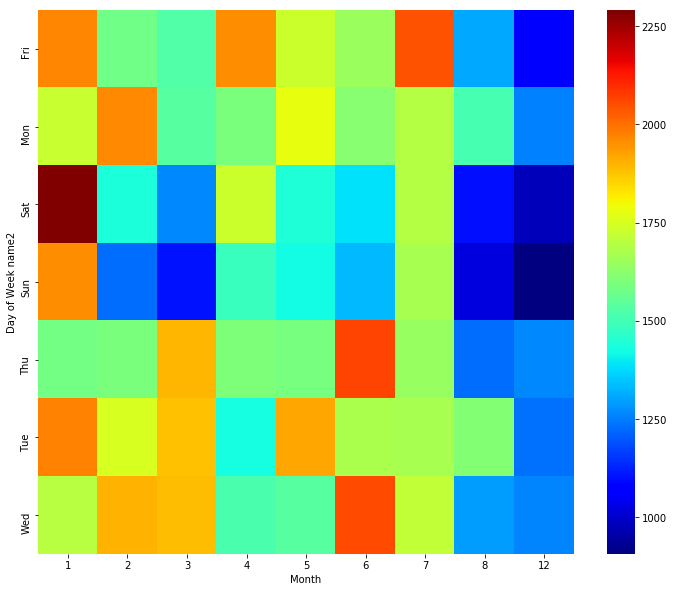

In [146]:
plt.figure(figsize=(12,10))
sns.heatmap(dh,cmap='jet')

<Figure size 864x720 with 0 Axes>

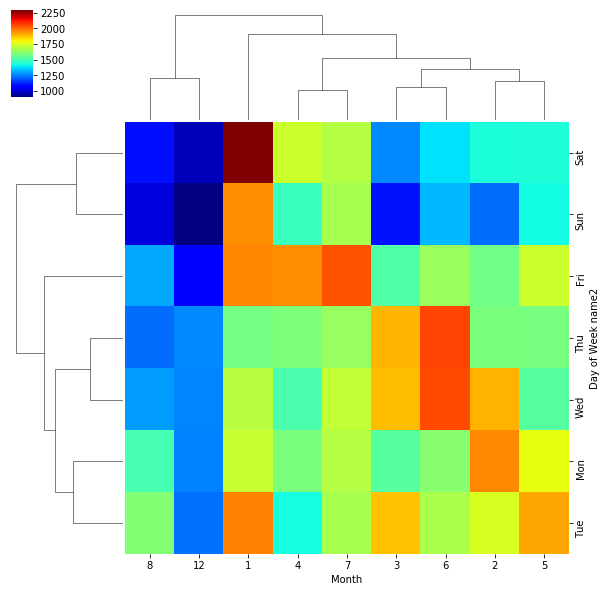

In [147]:
plt.figure(figsize=(12,10))
sns.clustermap(dh,cmap='jet') 

In [148]:
dff=df.groupby(['Hour','Day of Week name2']).count()['e'].reset_index()

In [149]:
dff

,Hour,Day of Week name2,e
0,0,Fri,275
1,0,Mon,282
2,0,Sat,375
3,0,Sun,383
4,0,Thu,278
5,0,Tue,269
6,0,Wed,250
7,1,Fri,235
8,1,Mon,221
9,1,Sat,301


In [153]:
dfff=dff.pivot(index='Day of Week name2',columns='Hour',values='e')
dfff

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week name2,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


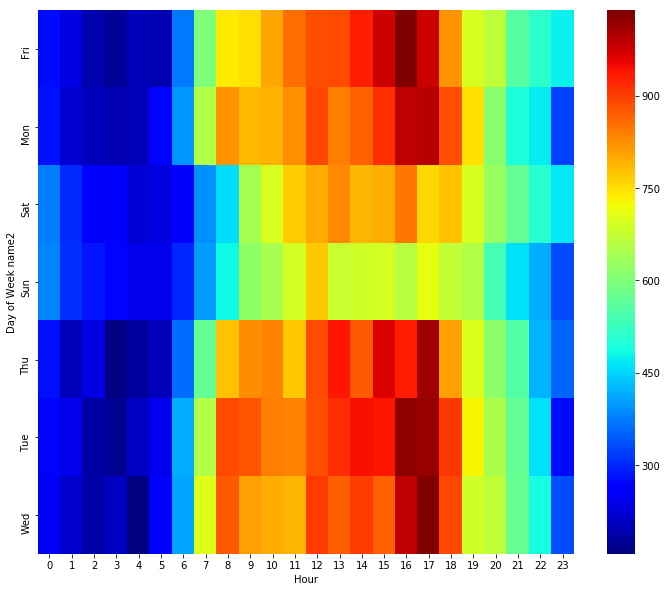

In [154]:
plt.figure(figsize=(12,10))
sns.heatmap(dfff,cmap='jet')